# Machine Learning for Classification and Regression

In [2]:
# 1. IMPORT LIBRARIES AND SETUP

In [3]:
# Standard library imports
import warnings
from datetime import datetime

# Third-party library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV
)
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Visualization settings
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
# 2. DATA LOADING AND INITIAL INSPECTION

In [5]:
def load_data(filepath):
    """Load dataset with error handling and basic validation"""
    try:
        # Corrected file path syntax - added quotes around the path
        df = pd.read_csv("/content/healthcare_dataset.csv", parse_dates=['Date of Admission', 'Discharge Date'])
        print(f"Data loaded successfully. Shape: {df.shape}")

        # Basic validation
        assert not df.empty, "Loaded an empty dataframe"
        assert 'Age' in df.columns, "Age column missing"
        return df

    except FileNotFoundError:
        raise FileNotFoundError(f"File not found at {filepath}")
    except Exception as e:
        raise Exception(f"Error loading data: {str(e)}")

# Load the data
try:
    # Make sure to use the correct path to your dataset
    # You can either use the full path or relative path
    df = load_data("healthcare_dataset.csv")  # Or use the full path as shown above

    # Initial inspection
    print("\n=== Initial Data Preview ===")
    display(df.head(3))

    print("\n=== Data Types ===")
    print(df.dtypes)

    print("\n=== Missing Values ===")
    print(df.isnull().sum())

    print("\n=== Basic Statistics ===")
    display(df.describe(include='all').T)

except Exception as e:
    print(f"Initialization error: {str(e)}")
    exit()

Data loaded successfully. Shape: (55500, 15)

=== Initial Data Preview ===


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal



=== Data Types ===
Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
dtype: object

=== Missing Values ===
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

=== Basic Sta

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Name,55500,49992,DAvId muNoZ,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,55500.0,NaN,NaN,NaN,51.539459,13.0,35.0,52.0,68.0,89.0,19.602454
Gender,55500,2,Male,27774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Type,55500,8,A-,6969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Condition,55500,6,Arthritis,9308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Admission,55500,NaN,NaN,NaN,2021-11-01 01:02:22.443243008,2019-05-08 00:00:00,2020-07-28 00:00:00,2021-11-01 00:00:00,2023-02-03 00:00:00,2024-05-07 00:00:00,NaN
Doctor,55500,40341,Michael Smith,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital,55500,39876,LLC Smith,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance Provider,55500,5,Cigna,11249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Billing Amount,55500.0,NaN,NaN,NaN,25539.316097,-2008.49214,13241.224652,25538.069376,37820.508436,52764.276736,14211.454431


In [6]:
# 3. DATA CLEANING AND PREPROCESSING

In [7]:
def clean_data(df):
    """Perform data cleaning operations"""
    df_clean = df.copy()

    # 1. Drop irrelevant columns
    cols_to_drop = ['Name', 'Doctor', 'Hospital']  # High cardinality or PII
    df_clean = df_clean.drop(columns=cols_to_drop)

    # 2. Standardize text columns
    text_cols = ['Gender', 'Blood Type', 'Medical Condition',
                'Insurance Provider', 'Admission Type', 'Medication']
    for col in text_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].str.strip().str.title()

    # 3. Handle dates
    df_clean['Duration of Stay'] = (df_clean['Discharge Date'] - df_clean['Date of Admission']).dt.days

    # Validate duration
    negative_duration = df_clean[df_clean['Duration of Stay'] < 0]
    if not negative_duration.empty:
        print(f"Warning: {len(negative_duration)} records with negative duration")
        # Option: Correct or remove these records
        df_clean = df_clean[df_clean['Duration of Stay'] >= 0]

    # 4. Create age groups
    bins = [0, 18, 35, 50, 65, 100]
    labels = ['Child', 'Young Adult', 'Adult', 'Senior', 'Elderly']
    df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels)

    return df_clean

df_clean = clean_data(df)
print("\n=== After Cleaning ===")
display(df_clean.head(3))


=== After Cleaning ===


,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Duration of Stay,Age_Group
0,30,Male,B-,Cancer,2024-01-31,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,Young Adult
1,62,Male,A+,Obesity,2019-08-20,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,Senior
2,76,Female,A-,Obesity,2022-09-22,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15,Elderly


In [8]:
# 4. EXPLORATORY DATA ANALYSIS (EDA)

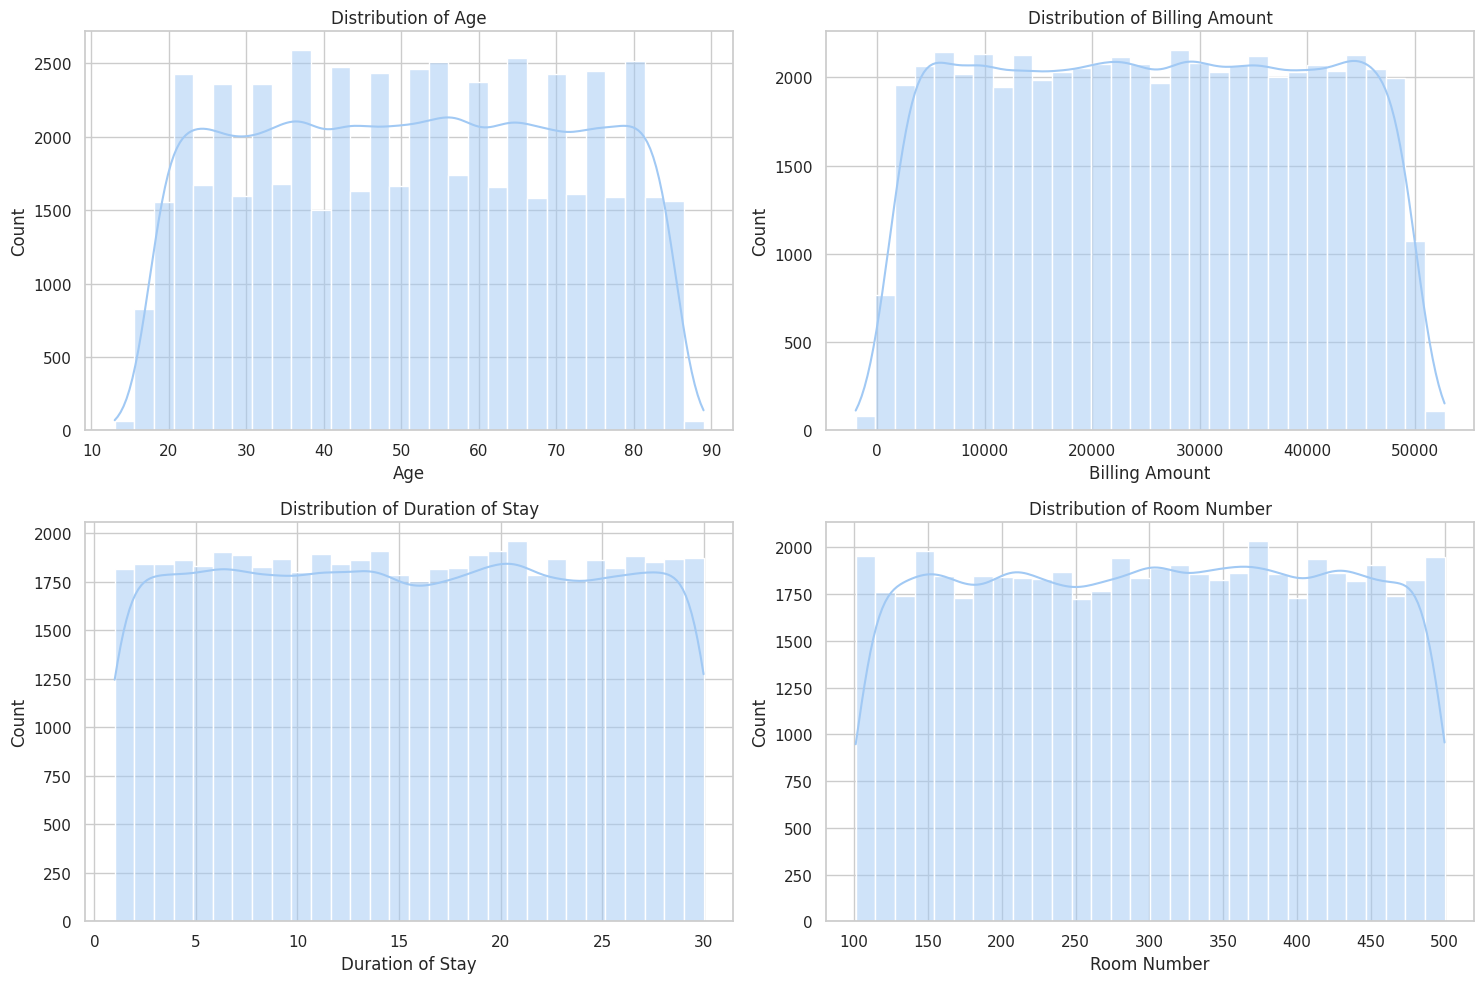

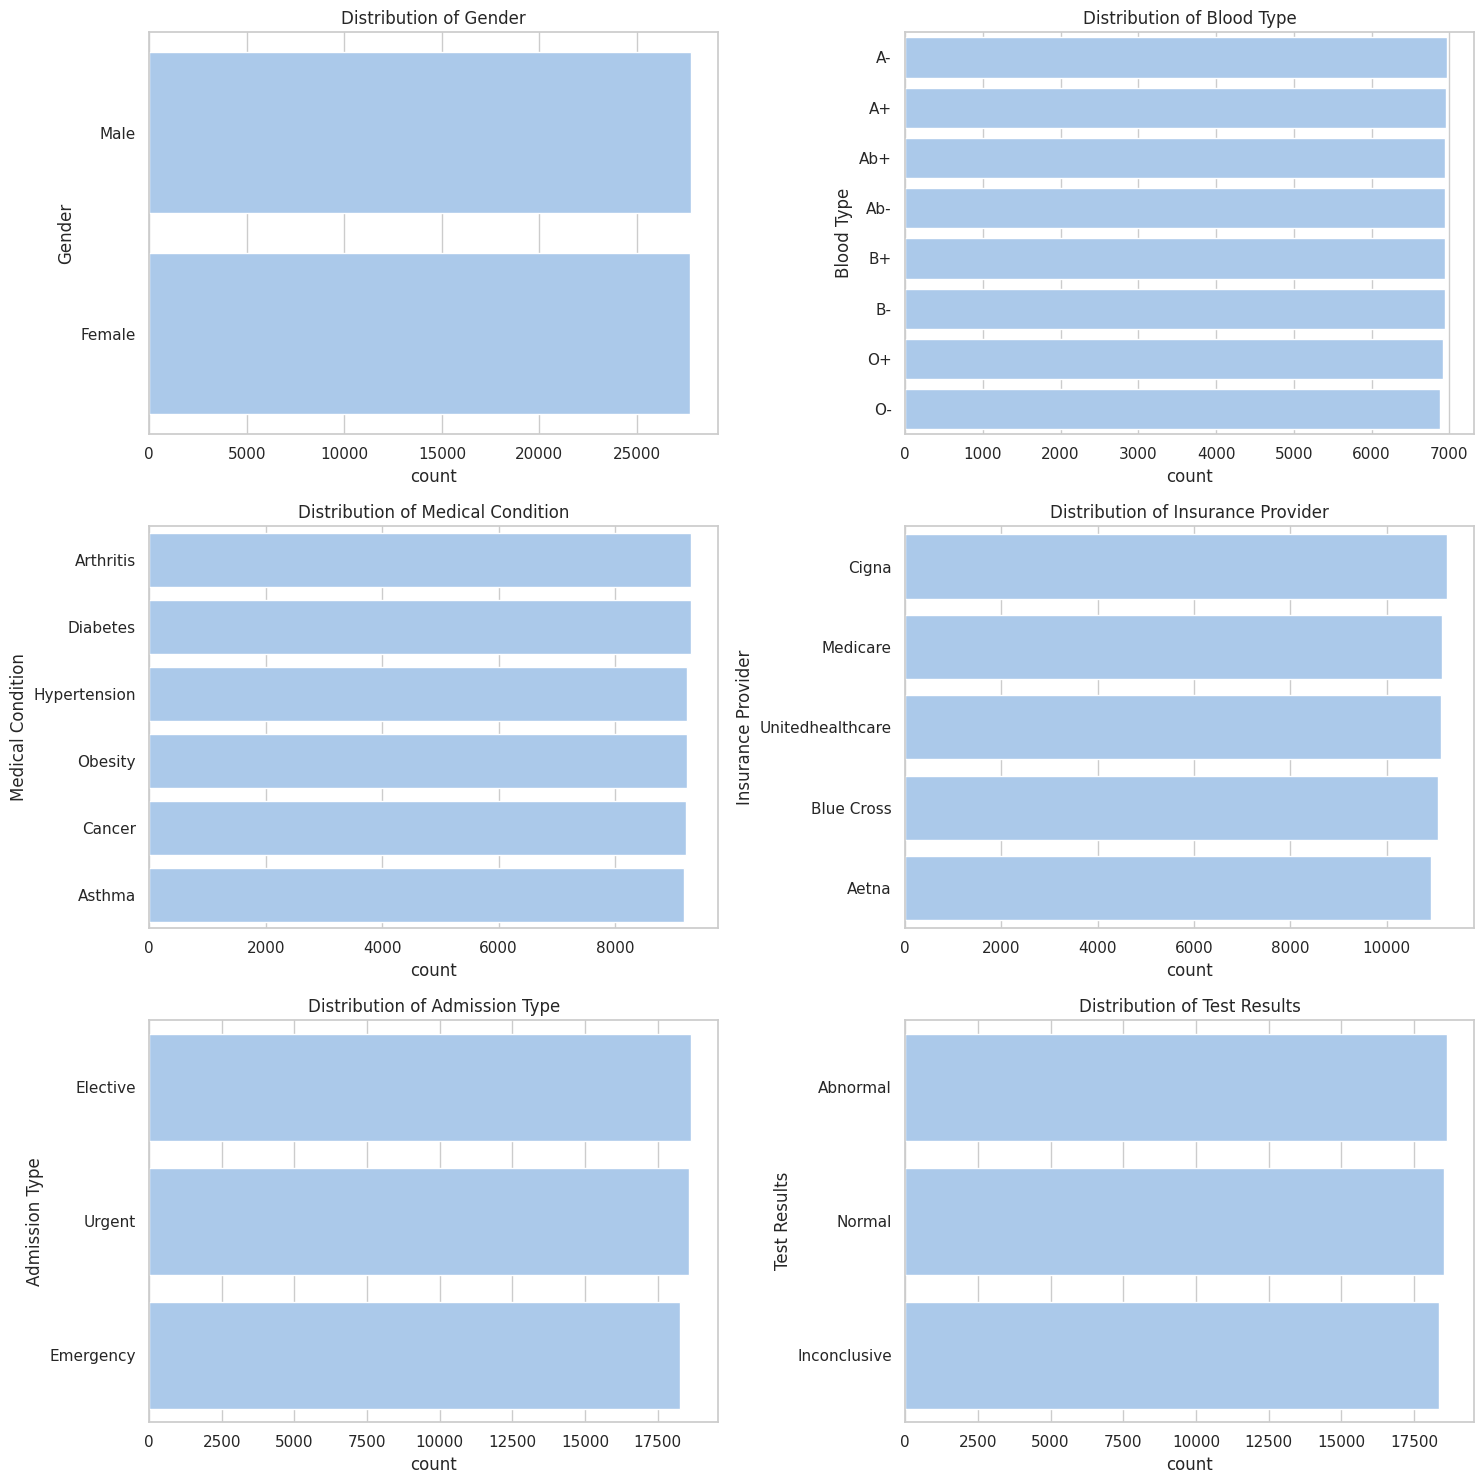

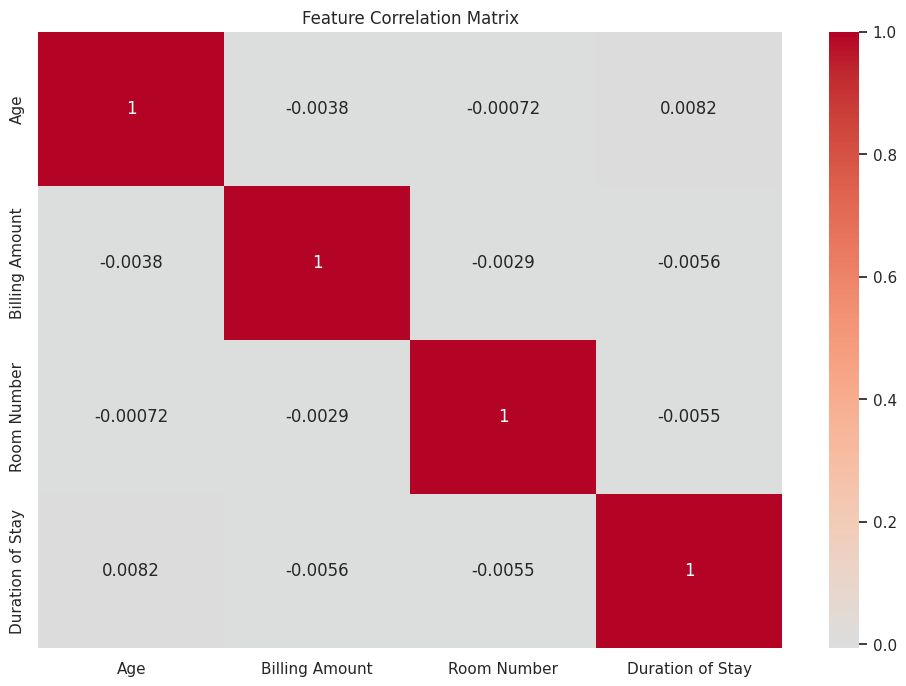

In [9]:
def plot_distributions(df):
    """Plot distributions of key features"""

    # 1. Numerical features
    num_cols = ['Age', 'Billing Amount', 'Duration of Stay', 'Room Number']
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    # 2. Categorical features
    cat_cols = ['Gender', 'Blood Type', 'Medical Condition',
               'Insurance Provider', 'Admission Type', 'Test Results']
    plt.figure(figsize=(15, 15))
    for i, col in enumerate(cat_cols, 1):
        plt.subplot(3, 2, i)
        sns.countplot(data=df, y=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    # 3. Correlation analysis
    plt.figure(figsize=(12, 8))
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
    plt.show()

plot_distributions(df_clean)

In [10]:
# 5. FEATURE ENGINEERING

In [17]:
def engineer_features(df):
    """Create new features and transform existing ones"""

    # 1. Convert dates to cyclical features
    for col in ['Date of Admission', 'Discharge Date']:
        df[f'{col}_month_sin'] = np.sin(2 * np.pi * df[col].dt.month/12)
        df[f'{col}_month_cos'] = np.cos(2 * np.pi * df[col].dt.month/12)
        df[f'{col}_day_sin'] = np.sin(2 * np.pi * df[col].dt.day/31)
        df[f'{col}_day_cos'] = np.cos(2 * np.pi * df[col].dt.day/31)

    # 2. Billing amount categories
    df['Billing_Category'] = pd.qcut(df['Billing Amount'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

    # 3. Interaction features
    df['Age_Billing_Ratio'] = df['Age'] / df['Billing Amount']

    return df

df_engineered = engineer_features(df_clean)
print("\n=== Engineered Features ===")
display(df_engineered[['Age_Billing_Ratio', 'Billing_Category']].head(3))


=== Engineered Features ===


,Age_Billing_Ratio,Billing_Category
0,0.001591,Medium
1,0.001843,High
2,0.002719,High


In [18]:
# 5. LABEL ENCODING FOR TARGET VARIABLE

In [19]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder for target variable
label_encoder = LabelEncoder()

# Before splitting the data, encode the target variable
df_engineered['Test Results'] = label_encoder.fit_transform(df_engineered['Test Results'])

# Verify the encoding
print("Class mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Class mapping: {'Abnormal': np.int64(0), 'Inconclusive': np.int64(1), 'Normal': np.int64(2)}


In [20]:
# 6. FEATURE ENCODING AND SCALING

In [21]:
def prepare_features(df, target_col='Test Results'):
    """Prepare features for modeling with proper label encoding"""

    # 1. Separate features and target (already encoded)
    X = df.drop(columns=[target_col, 'Date of Admission', 'Discharge Date'])
    y = df[target_col]  # Now numerical

    # 2. Define categorical and numerical features
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # 3. Encoding for categorical features
    # Binary encoding for Gender
    if 'Gender' in categorical_cols:
        X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})
        categorical_cols = categorical_cols.drop('Gender')

    # OneHotEncoding for other categoricals
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_cols = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
    encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

    # Combine features
    X_processed = pd.concat([
        X[numerical_cols],
        encoded_cols
    ], axis=1)

    # 4. Handle class imbalance
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_processed, y)

    # 5. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled,
        test_size=0.2,
        random_state=42,
        stratify=y_resampled
    )

    # 6. Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, label_encoder

# Now prepare features with properly encoded target
X_train, X_test, y_train, y_test, label_encoder = prepare_features(df_engineered)

In [22]:
# 7. MODEL TRAINING AND EVALUATION

In [ ]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Evaluate each model
results = {}
for name, model in models.items():
    print(f"\n=== Evaluating {name} ===")
    result = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = result

    # Convert numerical predictions back to original labels for reporting
    y_test_labels = label_encoder.inverse_transform(y_test)
    y_pred_labels = label_encoder.inverse_transform(result['predictions'])

    print(f"Accuracy: {result['accuracy']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test_labels, y_pred_labels))

    # Plot confusion matrix with original labels
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix(y_test_labels, y_pred_labels),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


=== Evaluating Random Forest ===
Accuracy: 0.4379
ROC AUC: 0.6451

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.46      0.45      3725
           1       0.44      0.42      0.43      3726
           2       0.44      0.43      0.44      3726

    accuracy                           0.44     11177
   macro avg       0.44      0.44      0.44     11177
weighted avg       0.44      0.44      0.44     11177



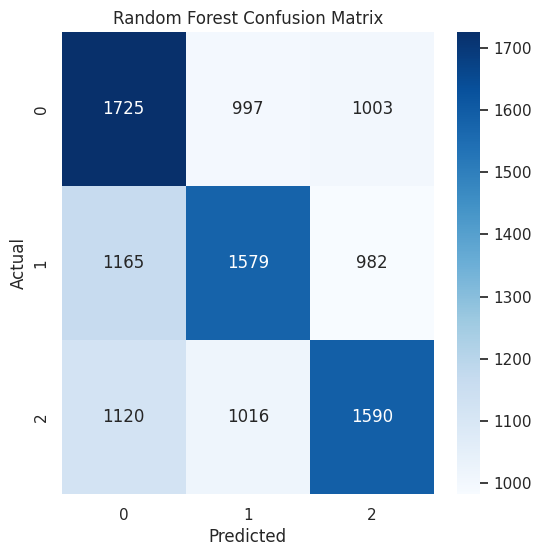

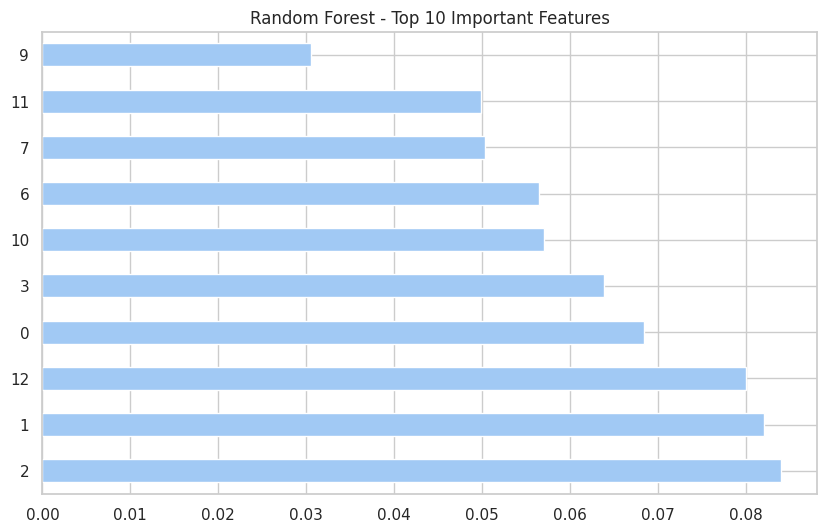


=== Evaluating XGBoost ===
Accuracy: 0.3797
ROC AUC: 0.5503

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.38      0.37      3725
           1       0.39      0.38      0.38      3726
           2       0.38      0.38      0.38      3726

    accuracy                           0.38     11177
   macro avg       0.38      0.38      0.38     11177
weighted avg       0.38      0.38      0.38     11177



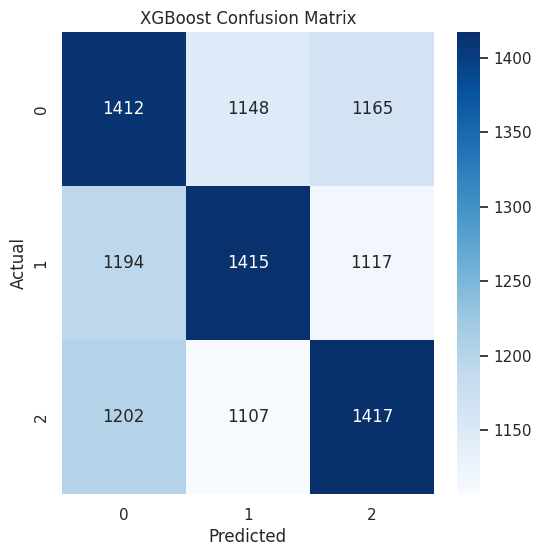

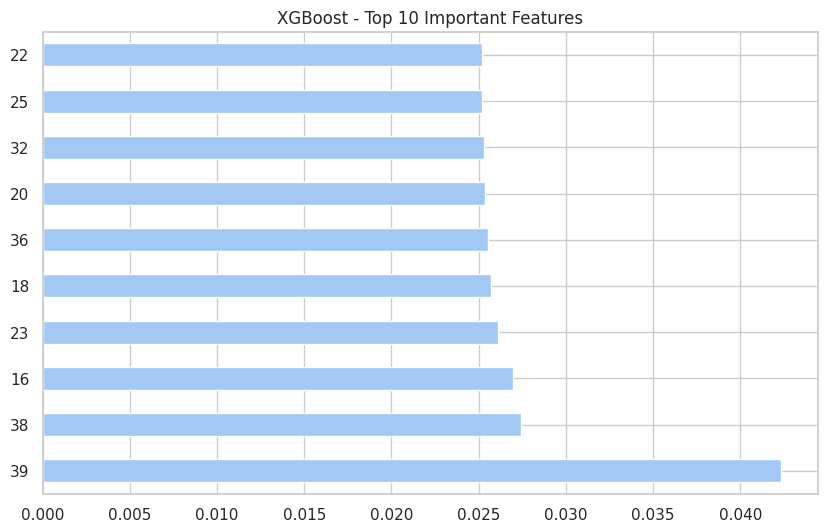


=== Evaluating Logistic Regression ===
Accuracy: 0.3326
ROC AUC: 0.4960

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33      3725
           1       0.33      0.32      0.32      3726
           2       0.34      0.35      0.34      3726

    accuracy                           0.33     11177
   macro avg       0.33      0.33      0.33     11177
weighted avg       0.33      0.33      0.33     11177



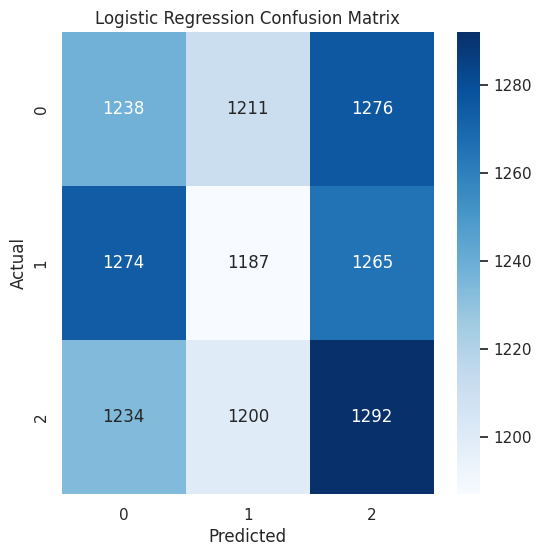


=== Evaluating SVM ===


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Evaluate a model with comprehensive metrics"""

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # ROC AUC if probabilities available
    roc_auc = None
    if y_proba is not None and len(np.unique(y_test)) > 1:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

    # Feature importance if available
    feature_importance = None
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.Series(
            model.feature_importances_,
            index=X_train.columns if hasattr(X_train, 'columns') else range(X_train.shape[1])
        ).sort_values(ascending=False)

    return {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm,
        'roc_auc': roc_auc,
        'feature_importance': feature_importance
    }

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Evaluate each model
results = {}
for name, model in models.items():
    print(f"\n=== Evaluating {name} ===")
    result = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = result

    print(f"Accuracy: {result['accuracy']:.4f}")
    if result['roc_auc'] is not None:
        print(f"ROC AUC: {result['roc_auc']:.4f}")
    print("\nClassification Report:")
    print(result['report'])

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot feature importance if available
    if result['feature_importance'] is not None:
        plt.figure(figsize=(10, 6))
        result['feature_importance'].head(10).plot(kind='barh')
        plt.title(f'{name} - Top 10 Important Features')
        plt.show()

In [1]:
# 8. MODEL OPTIMIZATION (EXAMPLE WITH RANDOM FOREST)

In [2]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize and fit grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\n=== Starting Grid Search ===")
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# Evaluate best model
print("\n=== Best Model Evaluation ===")
best_result = evaluate_model(best_model, X_train, X_test, y_train, y_test)
print(f"Test Accuracy: {best_result['accuracy']:.4f}")
print("\nClassification Report:")
print(best_result['report'])


NameError: name 'GridSearchCV' is not defined

In [ ]:
# 9. FINAL MODEL DEPLOYMENT PREPARATION

In [ ]:
import joblib
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing and model
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', best_model)
])

# Save the pipeline
joblib.dump(final_pipeline, 'healthcare_model_pipeline.pkl')

print("\n=== Model saved successfully ===")